# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

**Team 4** confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

    

In this section we will import and discuss, the libraries that will be used throughout the analysis and modelling. 

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns

# Libraries for data preparation and model building
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from scipy import stats


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 In this section we will load the data from the `df_train` file into a DataFrame. 



In [3]:
df = pd.read_csv("df_train.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section, we will perform an in-depth analysis of all the variables in the DataFrame.

We will look at:

- Categorical and numerical features
- features with null values
- features that have negative values
- Graphical and non graphical representaion of outliers
- Interactions of the features
- Distributions of the features
- features with 0.0 values

We are now checking to see if our dataset needs any cleaning 

In [4]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Above we observe that there are features that contain non-numerical values. These are __*Time*, *Valencia_wind_deg*__ and __*Seville_pressure*__


In [5]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above we can see that __*Valencia_pressure*__ has 2068 Null values and we are going to fill the missing values using the "fillna" fuction. We also are going to remove the *__"Unnamed: 0"__* feature because it is redundant (We do not need it). 

In [6]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

We also notice that __*load_shortfall_3h*__ has negative values the lowest being -6618. What do they mean? We believe that the Load Short Fall is the difference between the power generation through fossil fuel and renewable energy sources. The negative values of the Load Short Fall could mean that the fossil fuel is doing better than renewable energy in generating electricity and positive values could mean that renewable energy is doing well compared to fossil fuel.

In [7]:
#skewness
df.skew()

<ipython-input-7-ca90bfe58b72>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [8]:
#kurtosis
df.kurtosis()

<ipython-input-8-c1a853d8d8fd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

We can use the boxplot and scatter plot to see if we have and outliers in our data.

<AxesSubplot:>

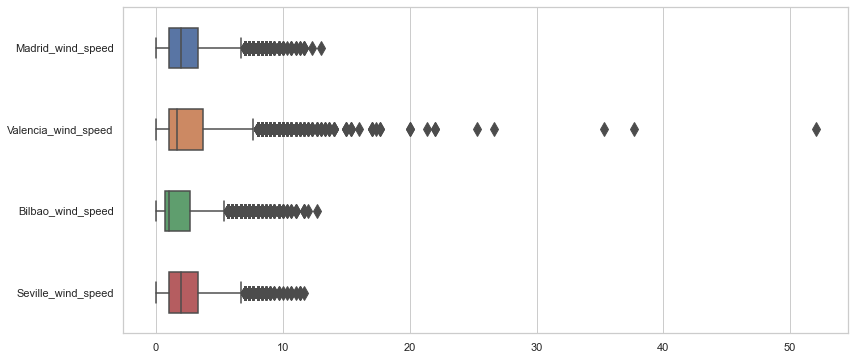

In [9]:
#wind speed
selected_columns = df[ [ 'Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed' ] ]
df_wind_speed = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_speed,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

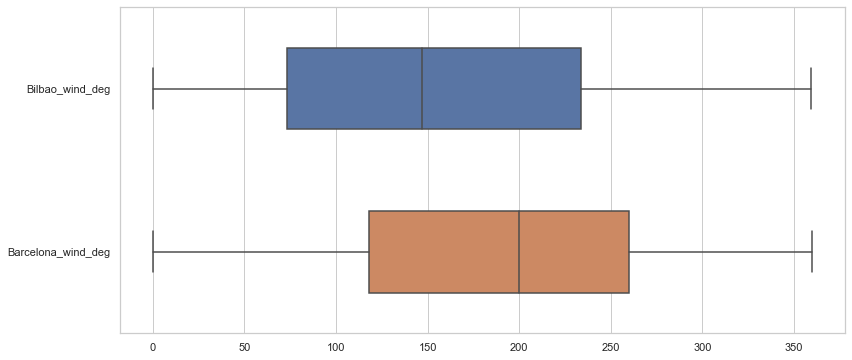

In [10]:
#wind speed
selected_columns = df[ [ 'Bilbao_wind_deg', 'Barcelona_wind_deg'] ]
df_wind_deg = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_deg,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

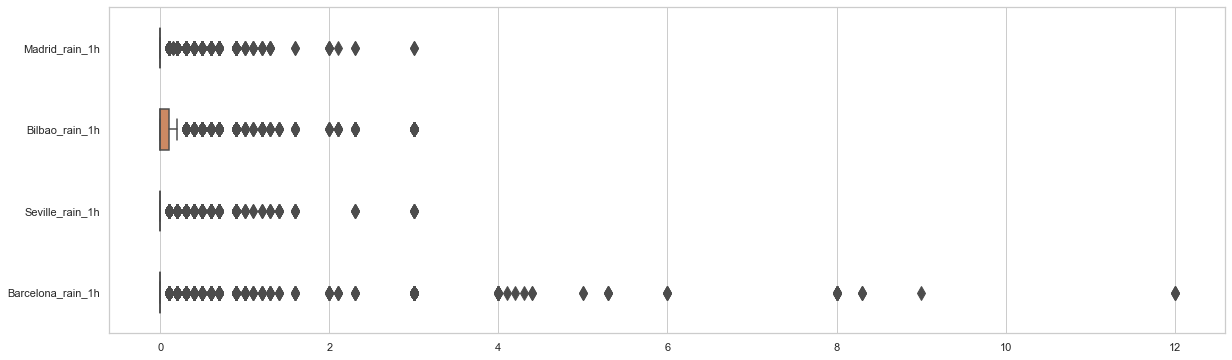

In [11]:
#rain_1h
selected_columns = df[ ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] ]
df_rain_1h = selected_columns.copy() 



sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=df_rain_1h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

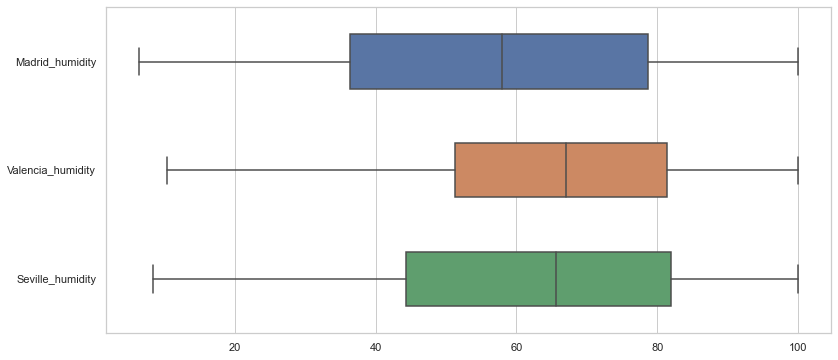

In [12]:
#humidity
selected_columns = df[ ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] ]
df_humidity = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_humidity,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

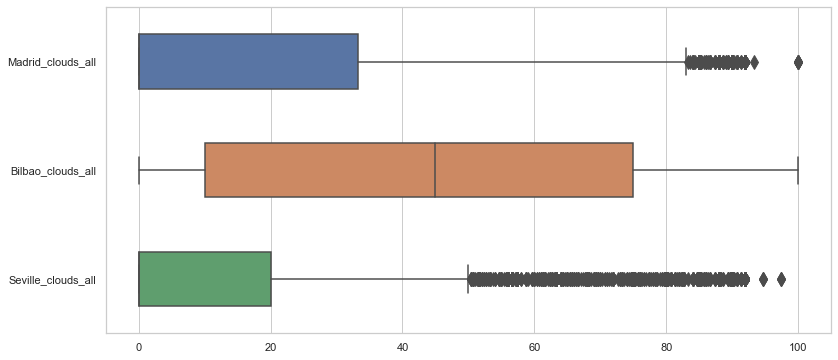

In [13]:
#clouds_all
selected_columns = df[ ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] ]
df_clouds_all = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_clouds_all,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

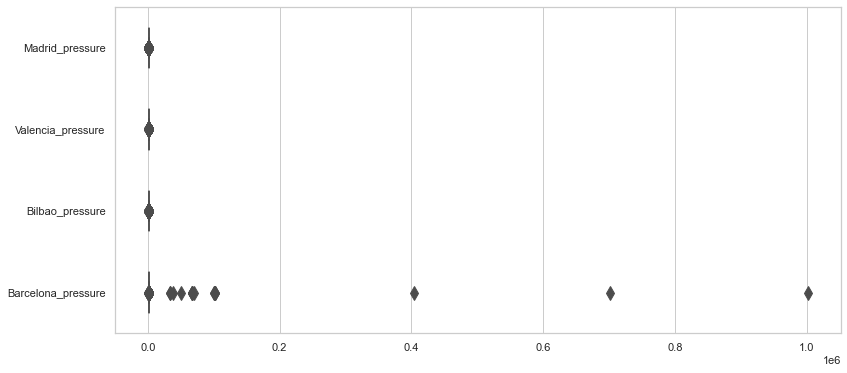

In [14]:
#pressure
selected_columns = df[ ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] ]
df_pressure = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_pressure,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

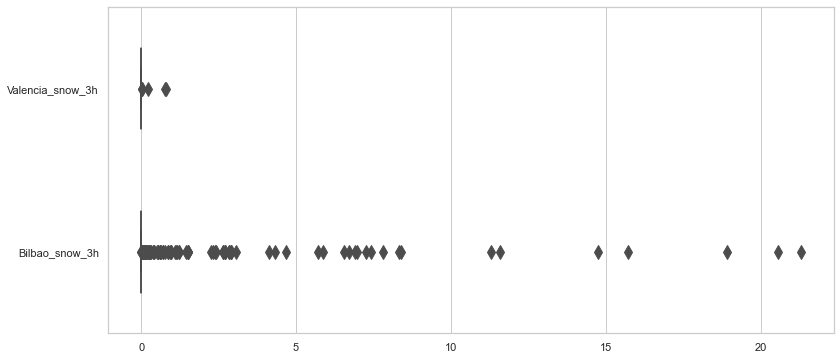

In [15]:
#snow_3h
selected_columns = df[ ['Valencia_snow_3h', 'Bilbao_snow_3h'] ]
df_snow_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_snow_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

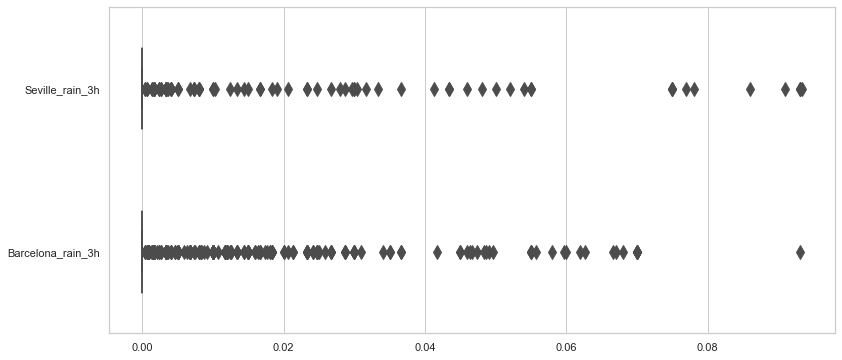

In [16]:
#rain_3h
selected_columns = df[ ['Seville_rain_3h', 'Barcelona_rain_3h' ]]
df_rain_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_rain_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

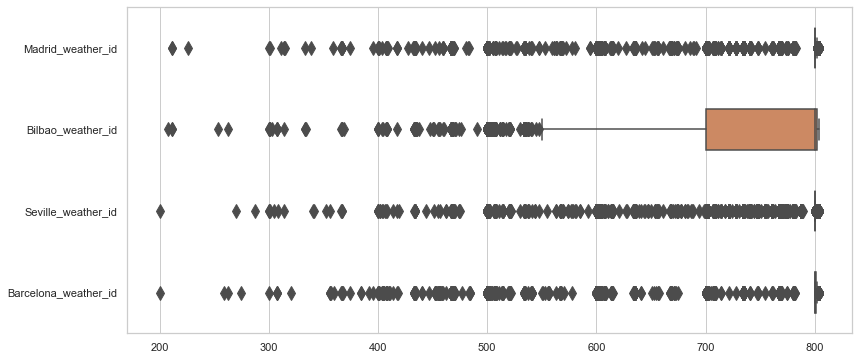

In [17]:
#weather_id
selected_columns = df[ ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id' ]]
df_weather_id = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_weather_id,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

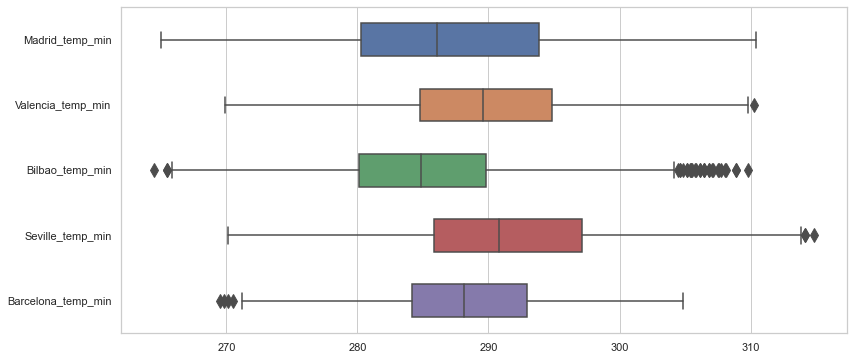

In [18]:
#temp_min
selected_columns = df[ ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min']]
df_temp_min = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp_min,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

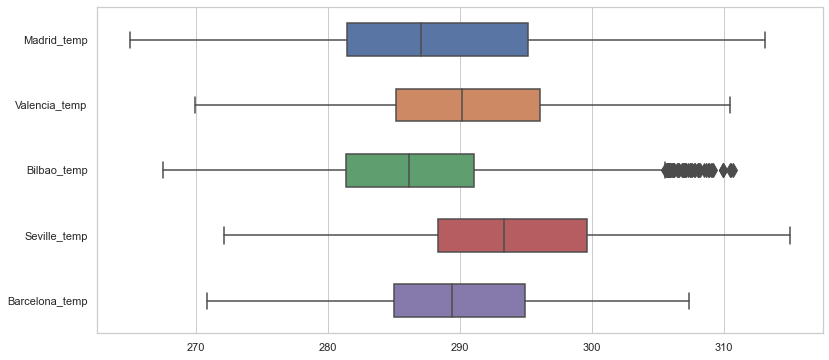

In [19]:
#temp
selected_columns = df[ ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp']]
df_temp = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp,orient="h",width=0.5, fliersize=10)

Plot relevant feature interactions

C:\Users\u1121\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Barcelona_temp', ylabel='load_shortfall_3h'>

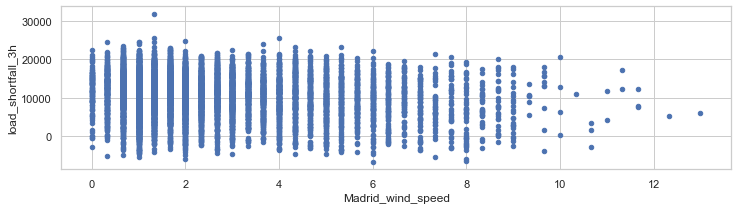

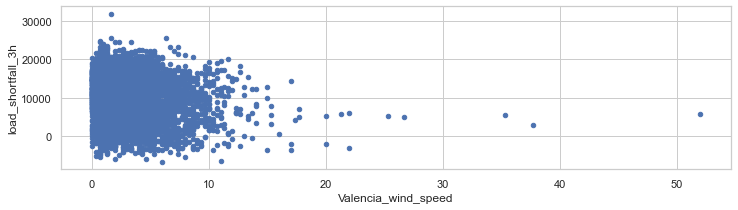

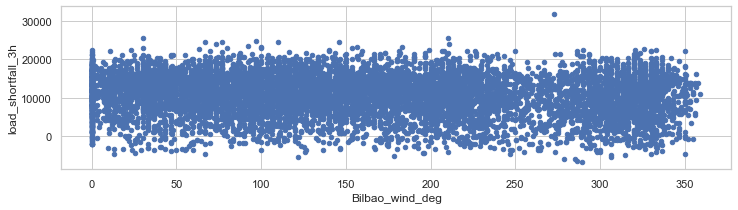

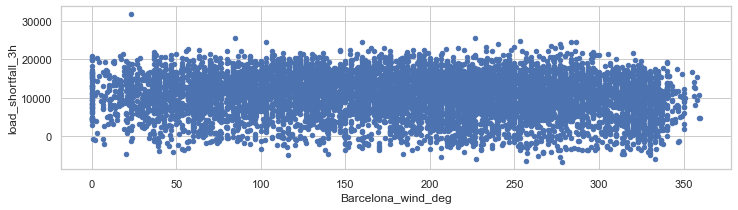

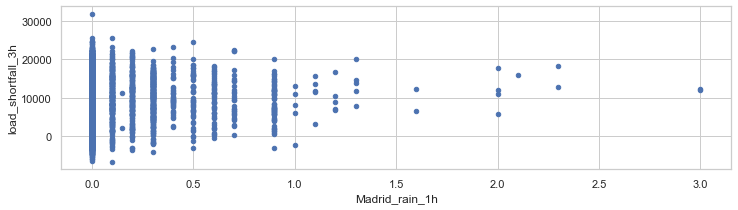

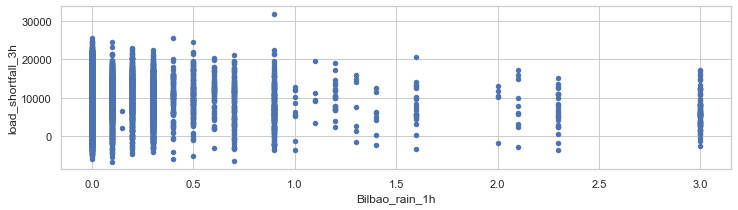

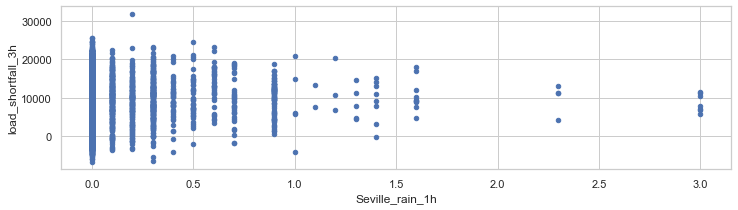

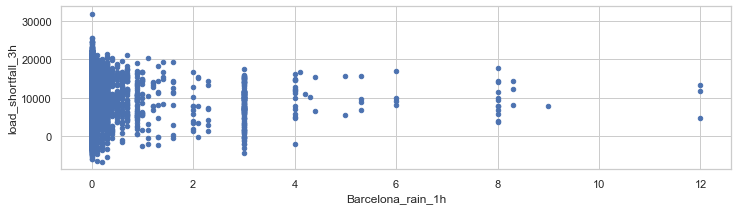

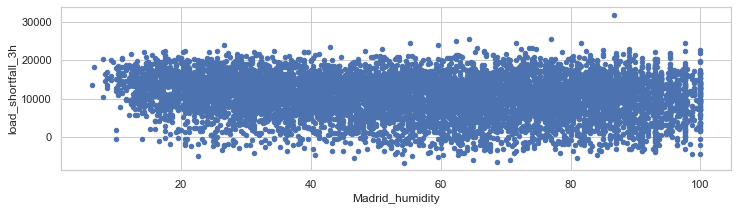

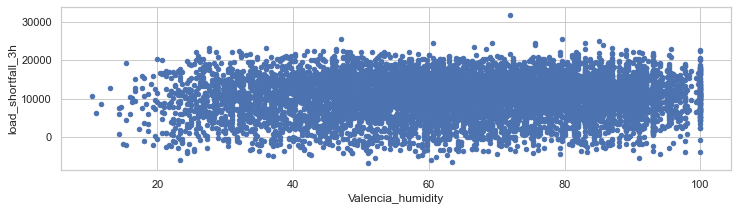

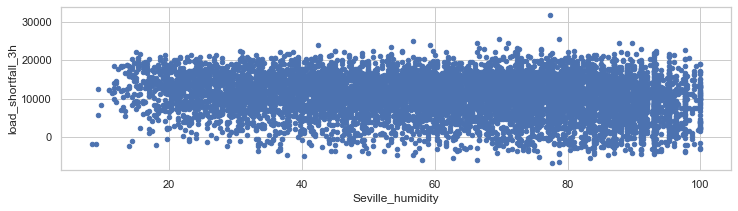

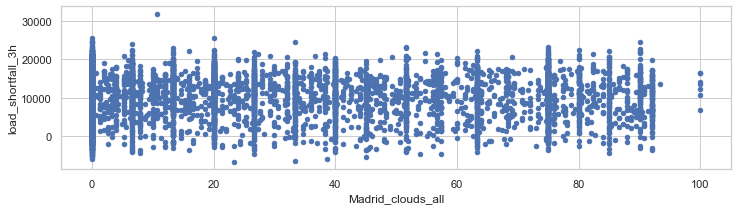

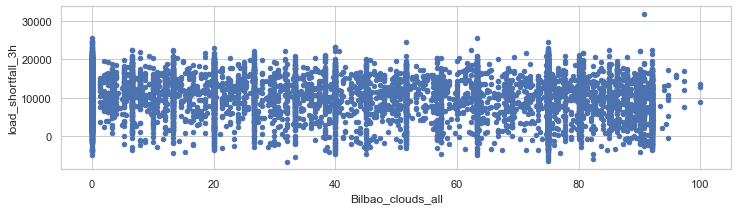

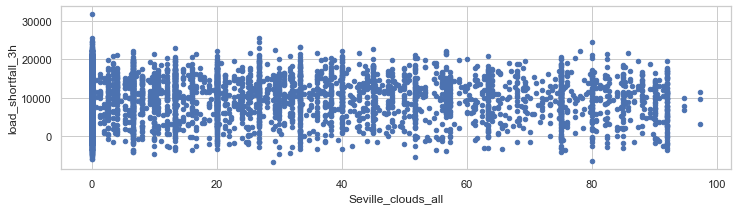

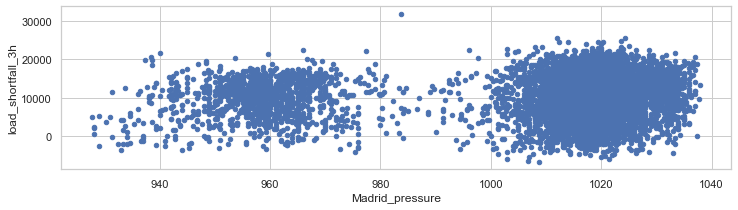

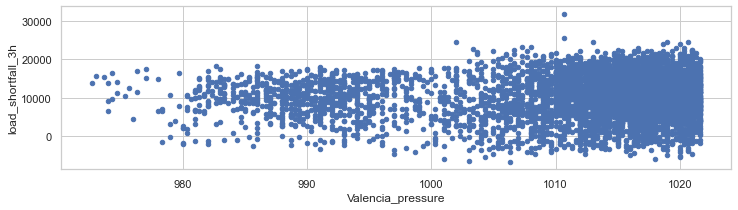

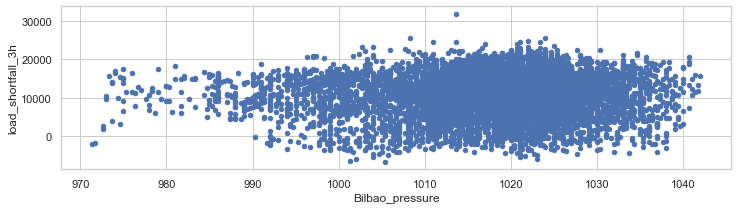

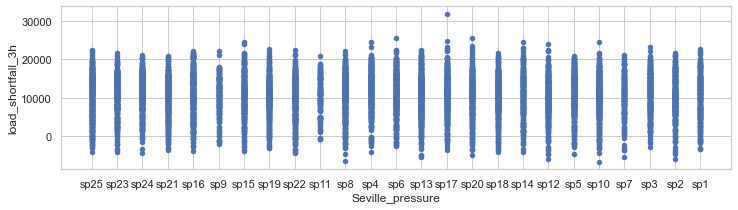

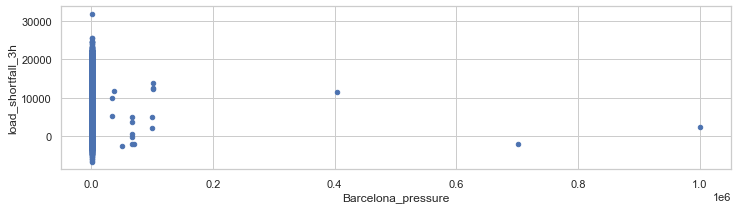

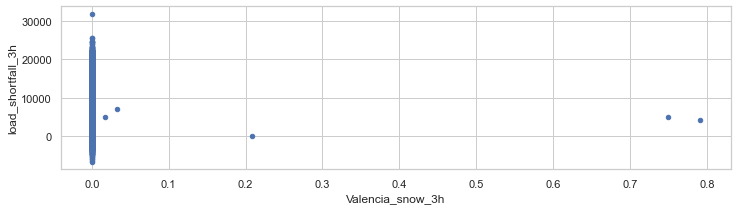

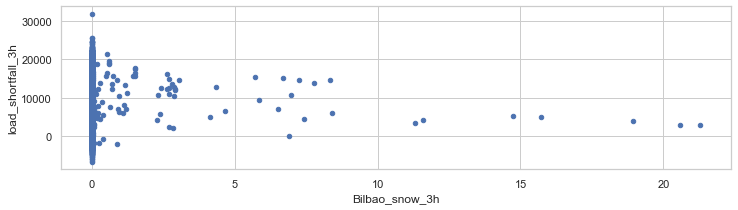

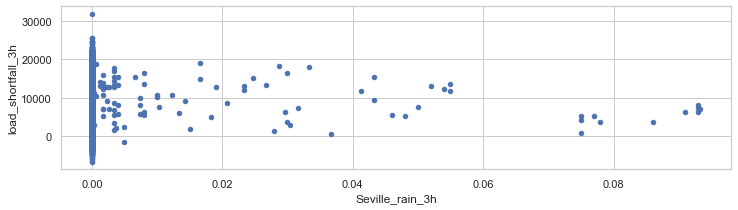

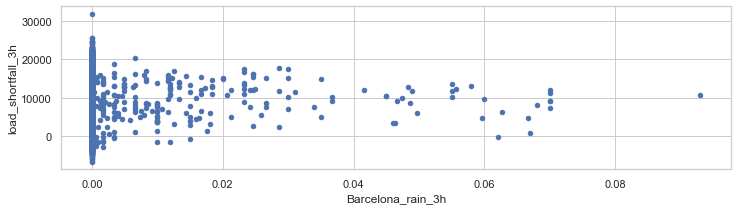

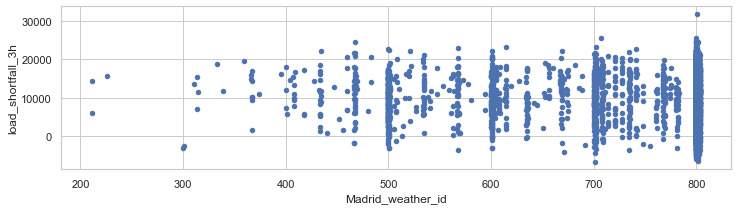

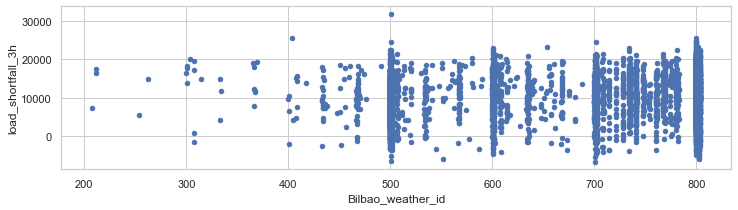

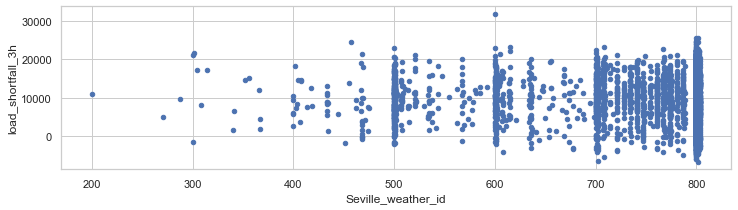

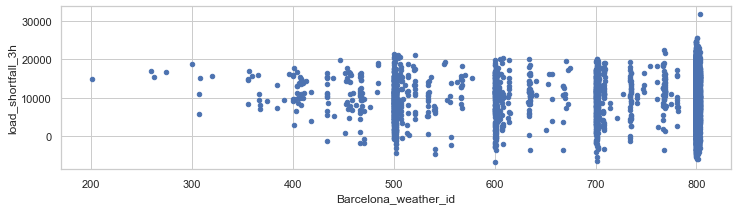

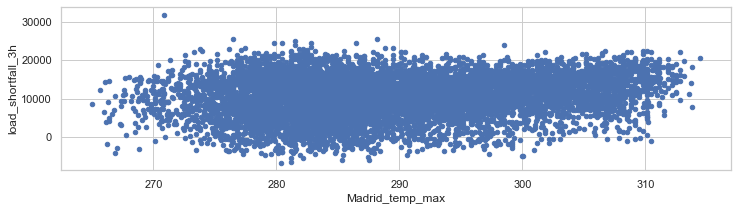

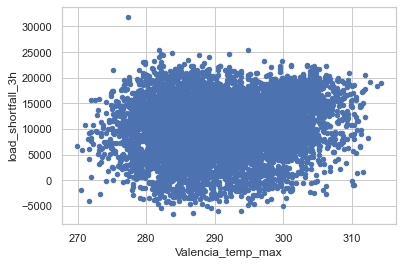

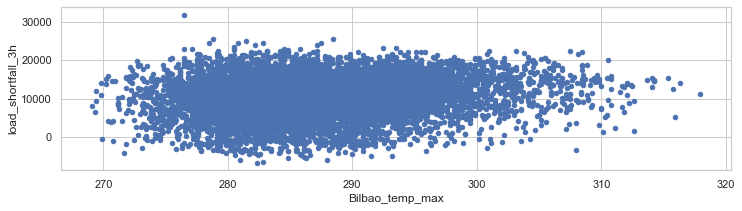

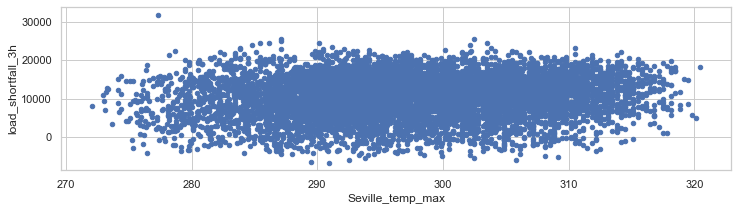

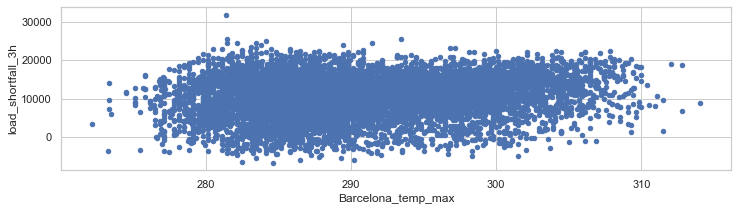

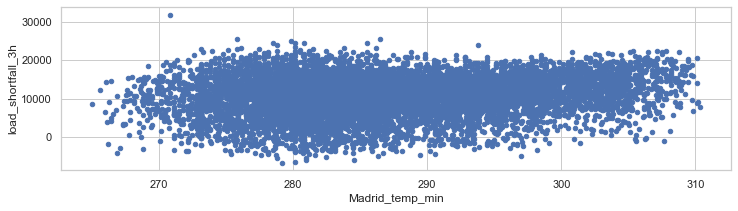

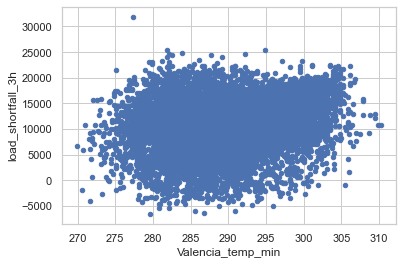

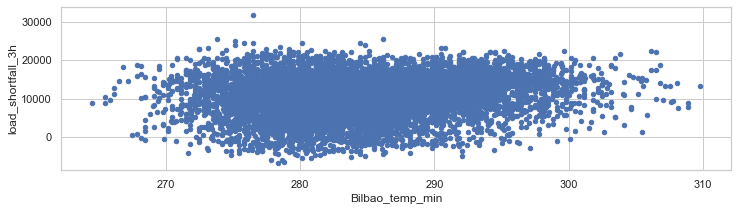

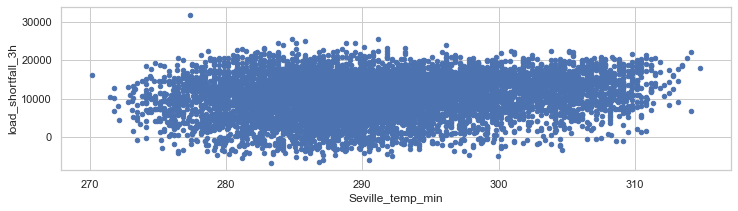

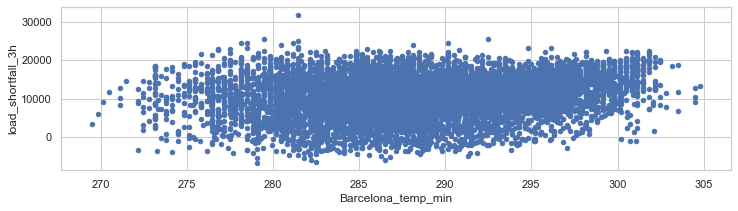

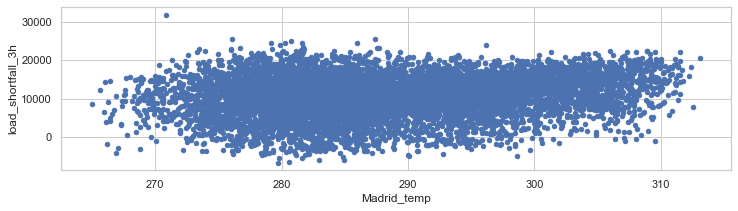

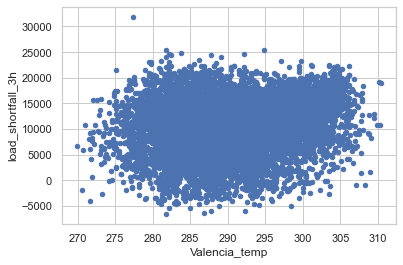

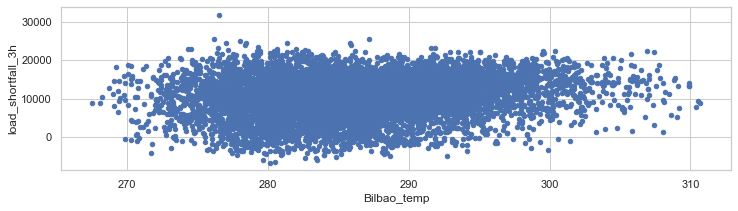

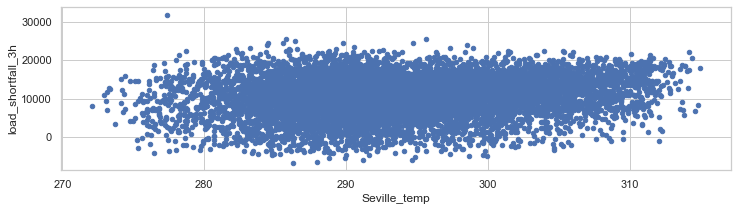

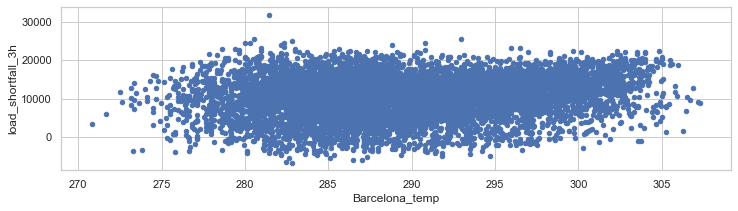

In [20]:
# wind speed
df.plot.scatter(x='Madrid_wind_speed',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_wind_speed',y='load_shortfall_3h', figsize=(12, 3))

# wind degrees
df.plot.scatter(x='Bilbao_wind_deg',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_wind_deg',y='load_shortfall_3h', figsize=(12, 3))

#rain
df.plot.scatter(x='Madrid_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_1h',y='load_shortfall_3h', figsize=(12, 3))

#humidity

df.plot.scatter(x='Madrid_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_humidity',y='load_shortfall_3h', figsize=(12, 3))

#clouds
df.plot.scatter(x='Madrid_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_clouds_all',y='load_shortfall_3h', figsize=(12, 3))


#pressure
df.plot.scatter(x='Madrid_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_pressure',y='load_shortfall_3h', figsize=(12, 3))

#snow_3h
df.plot.scatter(x='Valencia_snow_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_snow_3h',y='load_shortfall_3h', figsize=(12, 3))

#rain_3h
df.plot.scatter(x='Seville_rain_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_3h',y='load_shortfall_3h', figsize=(12, 3))

#weather_id
df.plot.scatter(x='Madrid_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_weather_id',y='load_shortfall_3h', figsize=(12, 3))

#temp_max
df.plot.scatter(x='Madrid_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_max',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_max',y='load_shortfall_3h', figsize=(12, 3))

#temp_min
df.plot.scatter(x='Madrid_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_min',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_min',y='load_shortfall_3h', figsize=(12, 3))

#temp
df.plot.scatter(x='Madrid_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp',y='load_shortfall_3h', figsize=(12, 3))

There is no clear negative or positive correclation with regards to the features and load shortfall

In [21]:
# evaluate correlation
df.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

The following features are positively correclated with load_shortfall_3h
 - Madrid_wind_speed
 - Bilbao_rain_1h
 - Valencia_wind_speed
 - Seville_humidity
 - Madrid_humidity
 - Madrid_humidity
 - Bilbao_clouds_all
 - Bilbao_wind_speed
 - Seville_clouds_all
 - Bilbao_wind_deg
 - Barcelona_wind_speed
 - Barcelona_wind_deg
 - Madrid_clouds_all
 - Seville_wind_speed
 - Barcelona_rain_1h
 - Bilbao_snow_3h
 - Barcelona_pressure
 - Seville_rain_3h
 - Madrid_rain_1h
 - Barcelona_rain_3h
 - Valencia_snow_3h


The following features are negatively correclated with load_shortfall_3h

 
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Valencia_temp_max
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min

We will observe the distributions of the variables by looking at their histograms and barplot

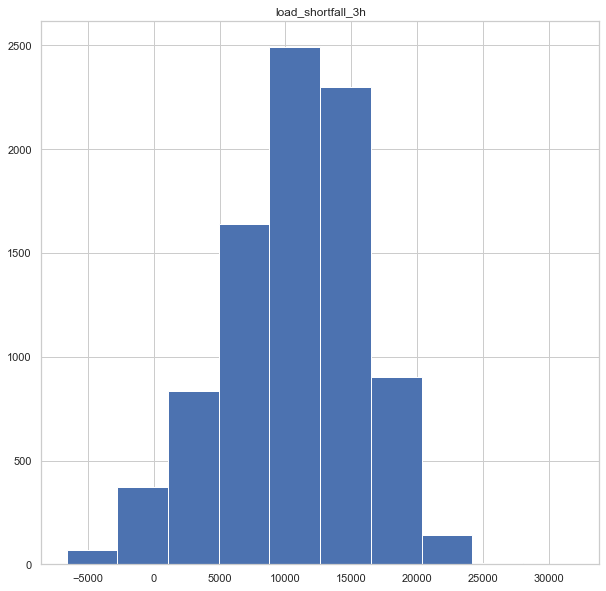

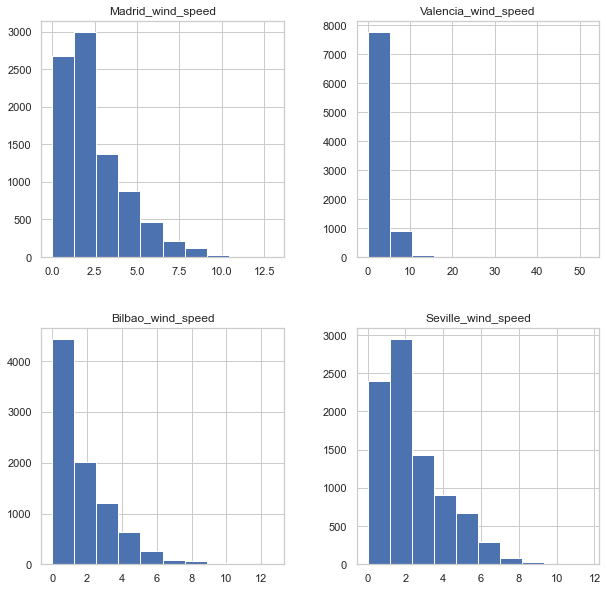

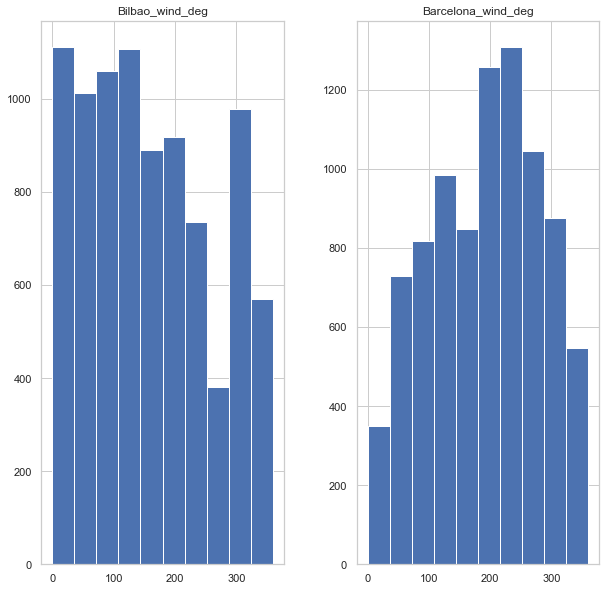

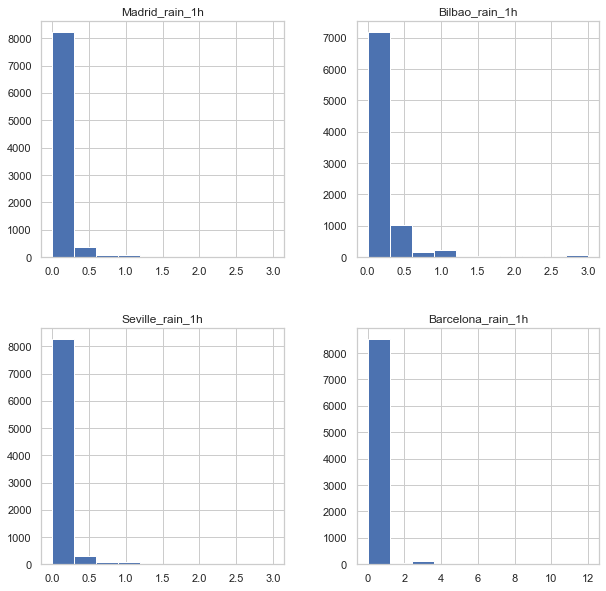

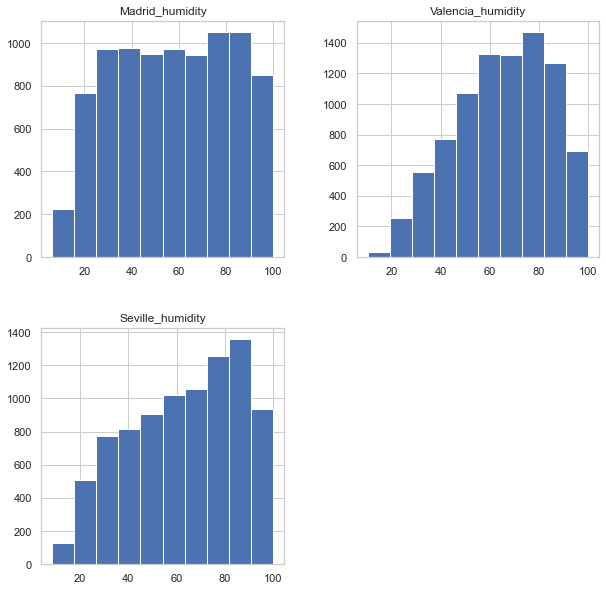

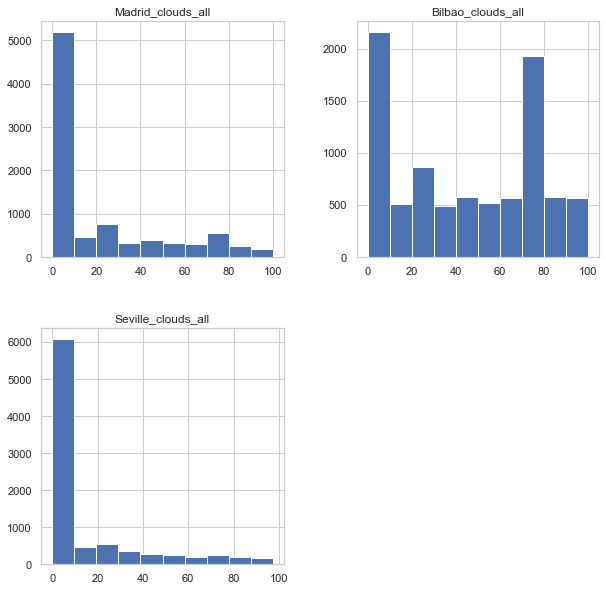

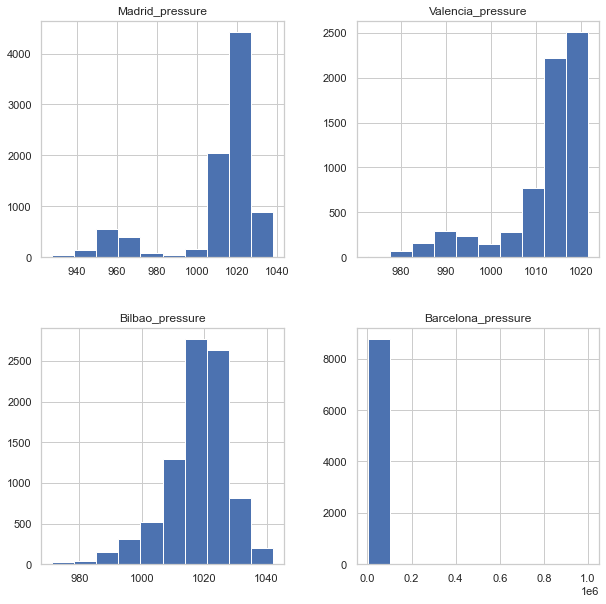

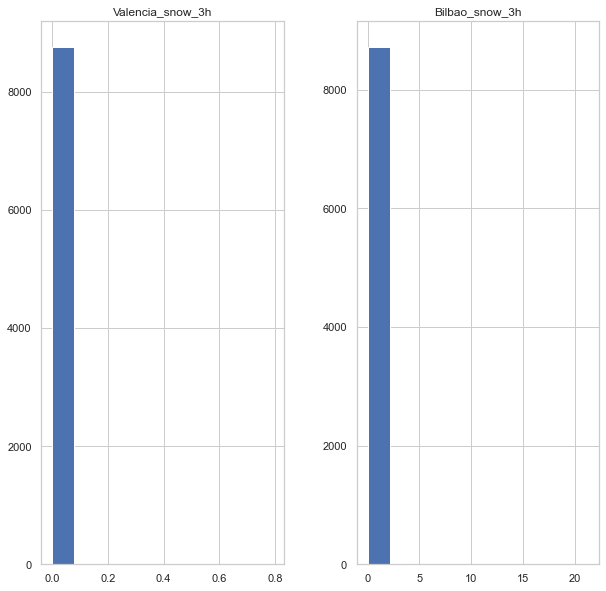

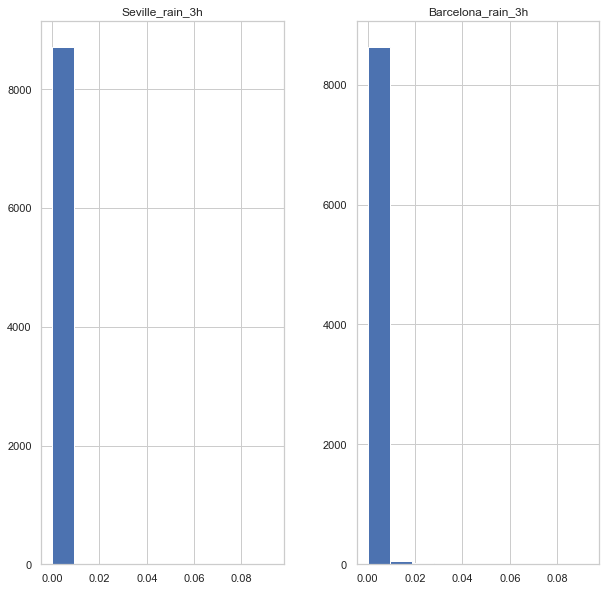

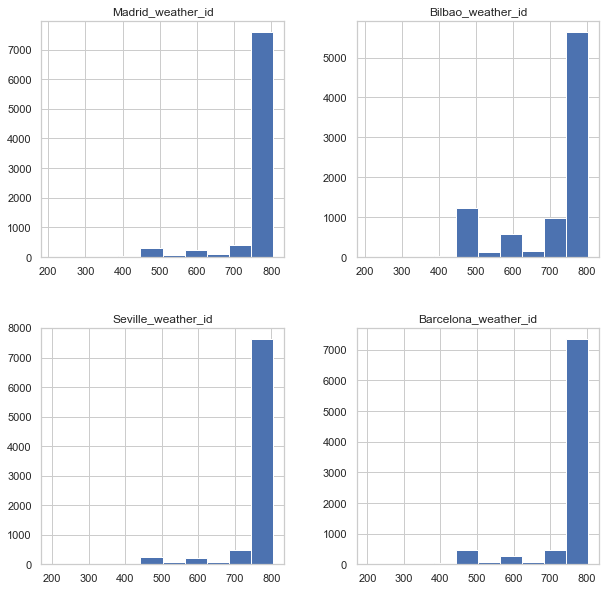

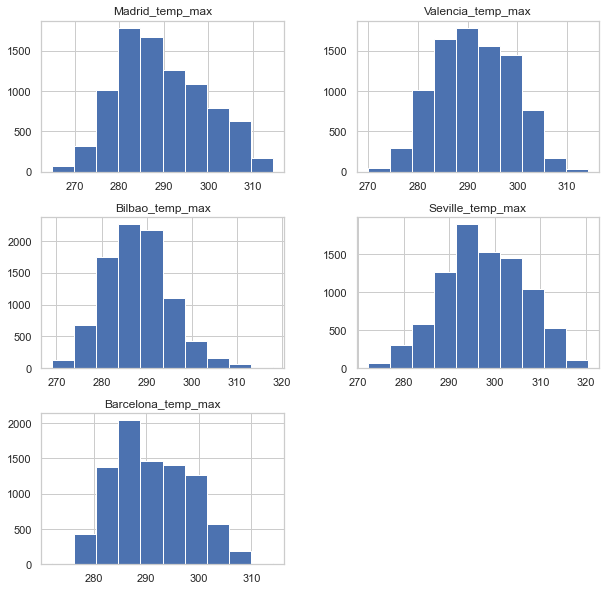

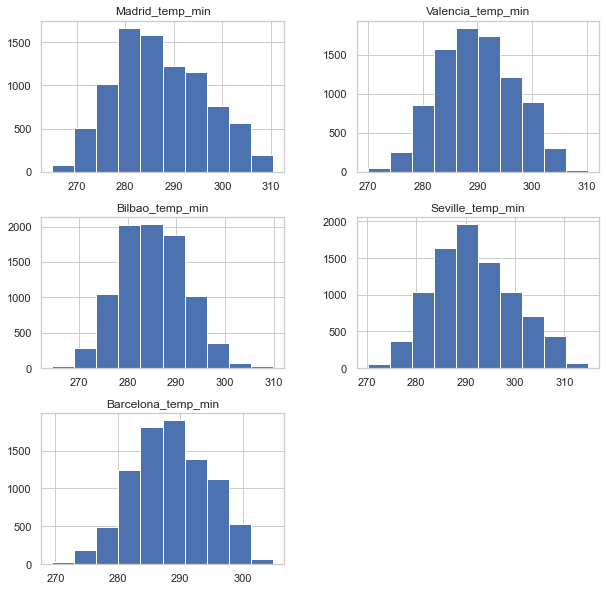

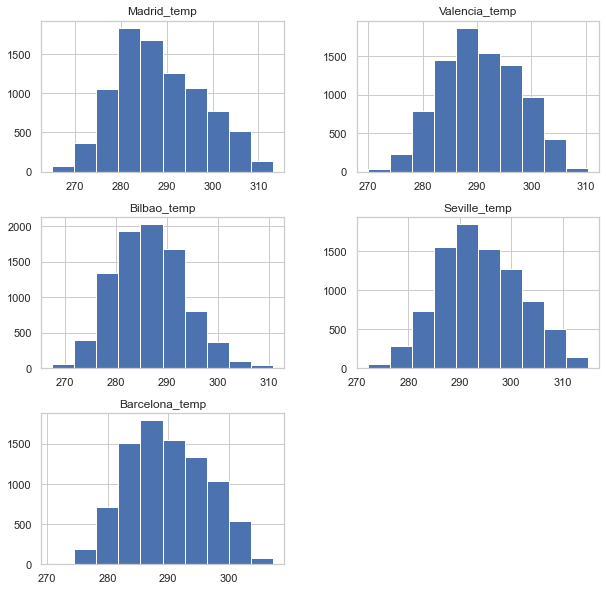

In [22]:
#histograms for Numerical data

#dependent variable
features_load_shortfall_3h = ['load_shortfall_3h']  # create a histogram for the y variable 
df[features_load_shortfall_3h].hist(figsize=(10,10), bins=10);

# wind speed
features_wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);
    
                             
# wind degrees
features_wind_speed = ['Bilbao_wind_deg', 'Barcelona_wind_deg'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);                             
                      
                             
#rain_1hr
features_rain_1h = ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] # create a list of all numerical features (rain_1h)
df[features_rain_1h].hist(figsize=(10,10), bins=10);   
                             
                          
#humidity
features_humidity = ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] # create a list of all numerical features (humidity)
df[features_humidity].hist(figsize=(10,10));
                                                         

#clouds
features_clouds_all = ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#pressure
features_clouds_all = ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#snow_3h
features_clouds_all = ['Valencia_snow_3h', 'Bilbao_snow_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));

#rain_3h
features_clouds_all = ['Seville_rain_3h', 'Barcelona_rain_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#weather_id
features_clouds_all = ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#temp_max                             
features_temp_max = ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Barcelona_temp_max'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);

#temp_max                             
features_temp_max = ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);                          
                     
#temp                            
features_temp_max = ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);
                             

We can observe from the graphs above that 'snow_3h' and 'Barcelona_pressure' only have zero values, we also observe that rain_3hrs has a lot of values with zeros. What should be done? We shall remove these columns in the Data Engineering section.

<AxesSubplot:xlabel='Seville_pressure', ylabel='count'>

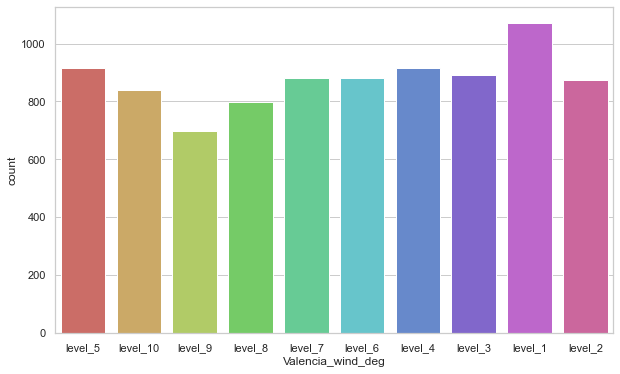

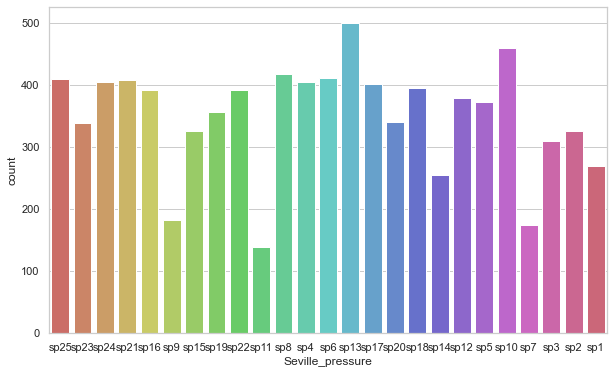

In [23]:
#categorical bar plots

#wind_deg
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")

#Seville_pressure
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")

From observation it seem that the distributions of 'Valencia_wind_deg'(categorical) is similar to the distributions of the numerical variables 'Bilbao_wind_deg' and 'Barcelona_wind_deg'.

The distribution of 'Seville_pressure (categorical) is also similar to the other numerical pressure variables 'Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure' and 'Seville_pressure'

We could possibly use the numerical variables to estimate the categorical variables.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section we will clean the dataset and engineer the features, as identified in the EDA phase. 

We will look at:

- Updating the categorical features (time,Valencia_wind_deg and Seville_pressure)
- Removing missing values
- Removing Outliers
- Variable selection using correlation
- Removing features with 0.0 values

We will change the time data type to date data

In [24]:
#changing the time column from 'object' dtype to 'date'

#df['time'] = pd.to_datetime(df['time']) 
datetime_series = pd.to_datetime(df['time']).astype('int64')


In [25]:
df = df.sort_values('time', ascending=True)
plt.plot(df['time'], df['load_shortfall_3h'])
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

Error in callback <function flush_figures at 0x00000271583BEA60> (for post_execute):


KeyboardInterrupt: 

We will replace the __Valencia_pressure__ missing values with the mean and then remove the columns, __Valencia_snow_3h__, __Bilbao_snow_3h__, __Seville_rain_3h__, and __Barcelona_rain_3h__ because they have only zero values.

In [27]:
# remove missing values/ features

#Filling missing value with the mean
df_no_missing = df.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_no_missing.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_no_missing.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)

df_no_missing.head()


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,1038.000000,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,1037.000000,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,1035.000000,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


There are now no variables with missing data

In [82]:
df_no_missing.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Barcelona_pressure      0
Madrid_rain_1h          0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te

We will remove the outliers using z scores

In [83]:
df_no_cat=df_no_missing.drop(['time','Valencia_wind_deg', 'Seville_pressure'], axis=1)

z = np.abs(stats.zscore(df_no_cat))

threshold = 3 
print(np.where(z > 3))

df2 = df_no_cat[(z < 3).all(axis=1)]

(array([  33,   34,   36, ..., 8759, 8760, 8761], dtype=int64), array([ 7,  7,  7, ...,  6,  6, 17], dtype=int64))


We used 3 standard deviations as a threshhold and everything lying away from this will be treated as an outlier. 

Below we can see the both datasets, with and without the outliers

In [84]:
df.shape

(8763, 49)

In [85]:
df2.shape

(6754, 41)

In [86]:
df2.describe()


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000,6754.000000
mean,2.091304,0.070788,2.240031,60.995262,55.082198,40.546491,1.646160,8.745879,149.660991,2.671577,195.526577,13.814727,2.207951,0.024489,0.008454,1023.865092,0.008062,791.302027,786.368251,1019.382934,789.957885,1013.273469,298.013907,1013.896876,291.549535,290.792269,741.571595,294.362023,65.742992,290.060340,291.465699,290.021611,290.065760,285.112683,286.600148,288.562351,288.235218,291.904885,288.803331,287.503170,11047.185137
std,1.500192,0.169170,1.774150,22.297974,23.913548,32.215801,1.407944,18.466801,100.849371,1.587854,89.013877,23.629499,1.474675,0.128467,0.045609,400.866627,0.042840,35.105426,47.921973,8.825854,33.325989,6.641361,8.834541,18.432750,7.716076,7.351369,101.965791,8.059768,18.838860,7.134593,7.421968,10.060128,6.704291,6.782053,6.812262,6.310135,6.996577,8.418598,9.671898,9.538668,5096.545489
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,670.666667,0.000000,560.833333,501.666667,987.666667,567.000000,987.333333,272.063000,944.000000,269.888000,269.888000,400.000000,272.063000,10.333333,269.888000,273.340000,264.983333,272.483333,265.483333,268.033333,270.150000,269.063000,270.150000,264.983333,264.983333,-4917.666667
25%,1.000000,0.000000,1.000000,43.000000,34.666667,6.666667,0.666667,0.000000,66.666667,1.333333,123.333333,0.000000,1.000000,0.000000,0.000000,1015.333333,0.000000,800.000000,800.000000,1015.333333,800.000000,1012.051407,292.150000,1014.333333,285.646667,285.150000,702.333333,288.495000,52.333333,284.651500,285.483333,282.150000,284.816667,280.150000,281.540417,284.074167,283.188750,285.789583,281.340000,280.150000,7944.250000
50%,1.666667,0.000000,1.666667,63.000000,54.666667,40.000000,1.000000,0.000000,133.333333,2.333333,203.000000,0.000000,2.000000,0.000000,0.000000,1018.666667,0.000000,800.000000,800.333333,1020.333333,800.000000,1013.666667,297.744167,1018.333333,291.483333,290.816667,800.000000,293.998115,67.666667,290.003333,290.816667,289.150000,289.816667,285.150000,286.581667,288.483333,288.150000,291.483333,287.858979,286.816667,11523.166667
75%,2.666667,0.000000,3.333333,80.333333,76.000000,75.000000,2.333333,6.666667,222.333333,3.666667,268.666667,20.000000,3.000000,0.000000,0.000000,1022.666667,0.000000,800.333333,801.000000,1024.666667,800.000000,1017.666667,304.816667,1022.666667,297.783333,296.489833,801.666667,300.229167,81.333333,295.483333,297.483333,297.716917,295.482500,290.150000,291.411667,293.483333,292.816667,297.816667,296.176667,294.816667,14744.666667
max,7.666667,1.200000,9.666667,100.000000,100.000000,100.000000,6.666667,86.333333,359.333333,8.000000,360.000000,92.000000,7.333333,2.000000,0.500000,33954.666667,0.400000,804.000000,804.000000,1042.000000,803.666667,1021.666667,320.483333,

We will exploring the correlations between the variables in order to do variable selection

In [87]:
df2.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.180783,0.451082,-0.202300,-0.251958,0.203596,0.278489,0.109442,0.216097,0.219534,-0.123297,0.134545,0.325914,0.091306,0.060787,-0.012309,0.110971,-0.071253,-0.094881,-0.207785,-0.025451,-0.085391,0.144531,-0.097924,0.213774,0.205956,-0.156141,0.191486,-0.251666,0.192855,0.157116,0.199221,0.168350,0.162368,0.149196,0.162000,0.131703,0.203112,0.218458,0.201308,-0.075951
Bilbao_rain_1h,0.180783,1.000000,0.167871,0.089938,0.103275,0.407898,0.053439,0.042992,0.223858,0.011160,-0.009032,0.115718,0.021648,0.048730,0.005528,0.011090,0.052270,-0.038251,-0.048890,-0.038561,0.002321,-0.088453,-0.183723,-0.168709,-0.092640,-0.092924,-0.785906,-0.164354,-0.136391,-0.090523,-0.124294,-0.135890,-0.117232,-0.106625,-0.143685,-0.102461,-0.178745,-0.131752,-0.127063,-0.112574,-0.119471
Valencia_wind_speed,0.451082,0.167871,1.000000,-0.206984,-0.139549,0.176794,0.379453,0.078724,0.209220,0.352721,-0.125683,0.152155,0.240704,0.062480,0.032077,-0.011432,0.064387,-0.043094,-0.055544,-0.026544,-0.013245,0.024773,0.089025,-0.070622,0.154346,0.160623,-0.103516,0.106809,-0.464727,0.162684,0.045470,0.074335,0.063071,0.083907,0.076946,0.077812,0.069076,0.107407,0.086675,0.072406,-0.075079
Seville_humidity,-0.202300,0.089938,-0.206984,1.000000,0.794671,0.035347,-0.177812,0.324349,-0.124794,-0.205305,0.234401,0.294409,-0.282481,-0.004390,0.159438,0.002882,0.103771,-0.176300,-0.053595,0.014954,-0.260513,-0.051942,-0.569280,-0.024684,-0.657772,-0.674146,-0.108159,-0.750238,0.466658,-0.673333,-0.617841,-0.716780,-0.635879,-0.636791,-0.632695,-0.621059,-0.608532,-0.794735,-0.727235,-0.699884,-0.189007
Madrid_humidity,-0.251958,0.103275,-0.139549,0.794671,1.000000,-0.009055,-0.081872,0.290109,-0.114627,-0.120060,0.261497,0.404881,-0.225479,-0.009502,0.144472,0.010991,0.153182,-0.255885,-0.054741,0.112331,-0.231769,-0.100652,-0.575366,-0.004016,-0.732026,-0.736980,-0.102752,-0.752215,0.372035,-0.725391,-0.723782,-0.821474,-0.726503,-0.681752,-0.674301,-0.688879,-0.644155,-0.792529,-0.824300,-0.782526,-0.167708
Bilbao_clouds_all,0.203596,0.407898,0.176794,0.035347,-0.009055,1.000000,0.013938,-0.011461,0.232816,0.052127,-0.055250,0.037861,0.011682,0.079623,-0.013327,0.013806,0.032614,-0.001076,-0.077602,0.048418,0.024240,0.027663,-0.039107,-0.036945,0.056078,0.049100,-0.482606,-0.041367,-0.139864,0.040342,0.028162,0.003798,0.030748,-0.009776,-0.046697,0.029382,-0.083926,-0.037379,0.002547,-0.002723,-0.088659
Bilbao_wind_speed,0.278489,0.053439,0.379453,-0.177812,-0.081872,0.013938,1.000000,0.086047,0.435437,0.279599,-0.044400,0.205122,0.152662,0.042238,0.069422,0.000084,0.087033,-0.095676,-0.025417,-0.078145,-0.040518,0.087152,0.149493,0.104977,0.144118,0.148914,0.002022,0.151329,-0.285477,0.150511,0.072964,0.095926,0.082762,0.165017,0.200943,0.086349,0.235577,0.136006,0.104768,0.096245,-0.016831
Seville_clouds_all,0.109442,0.042992,0.078724,0.324349,0.290109,-0.011461,0.086047,1.000000,0.014393,0.064636,0.036059,0.437149,0.031867,0.027758,0.326655,0.005978,0.194955,-0.231564,-0.071688,-0.224377,-0.374581,-0.092021,-0.117122,-0.136722,-0.150803,-0.156371,-0.030930,-0.158626,0.067997,-0.156543,-0.167148,-0.192539,-0.159676,-0.121117,-0.126805,-0.142598,-0.128631,-0.165554,-0.187344,-0.179158,-0.069262
Bilbao_wind_deg,0.216097,0.223858,0.209220,-0.

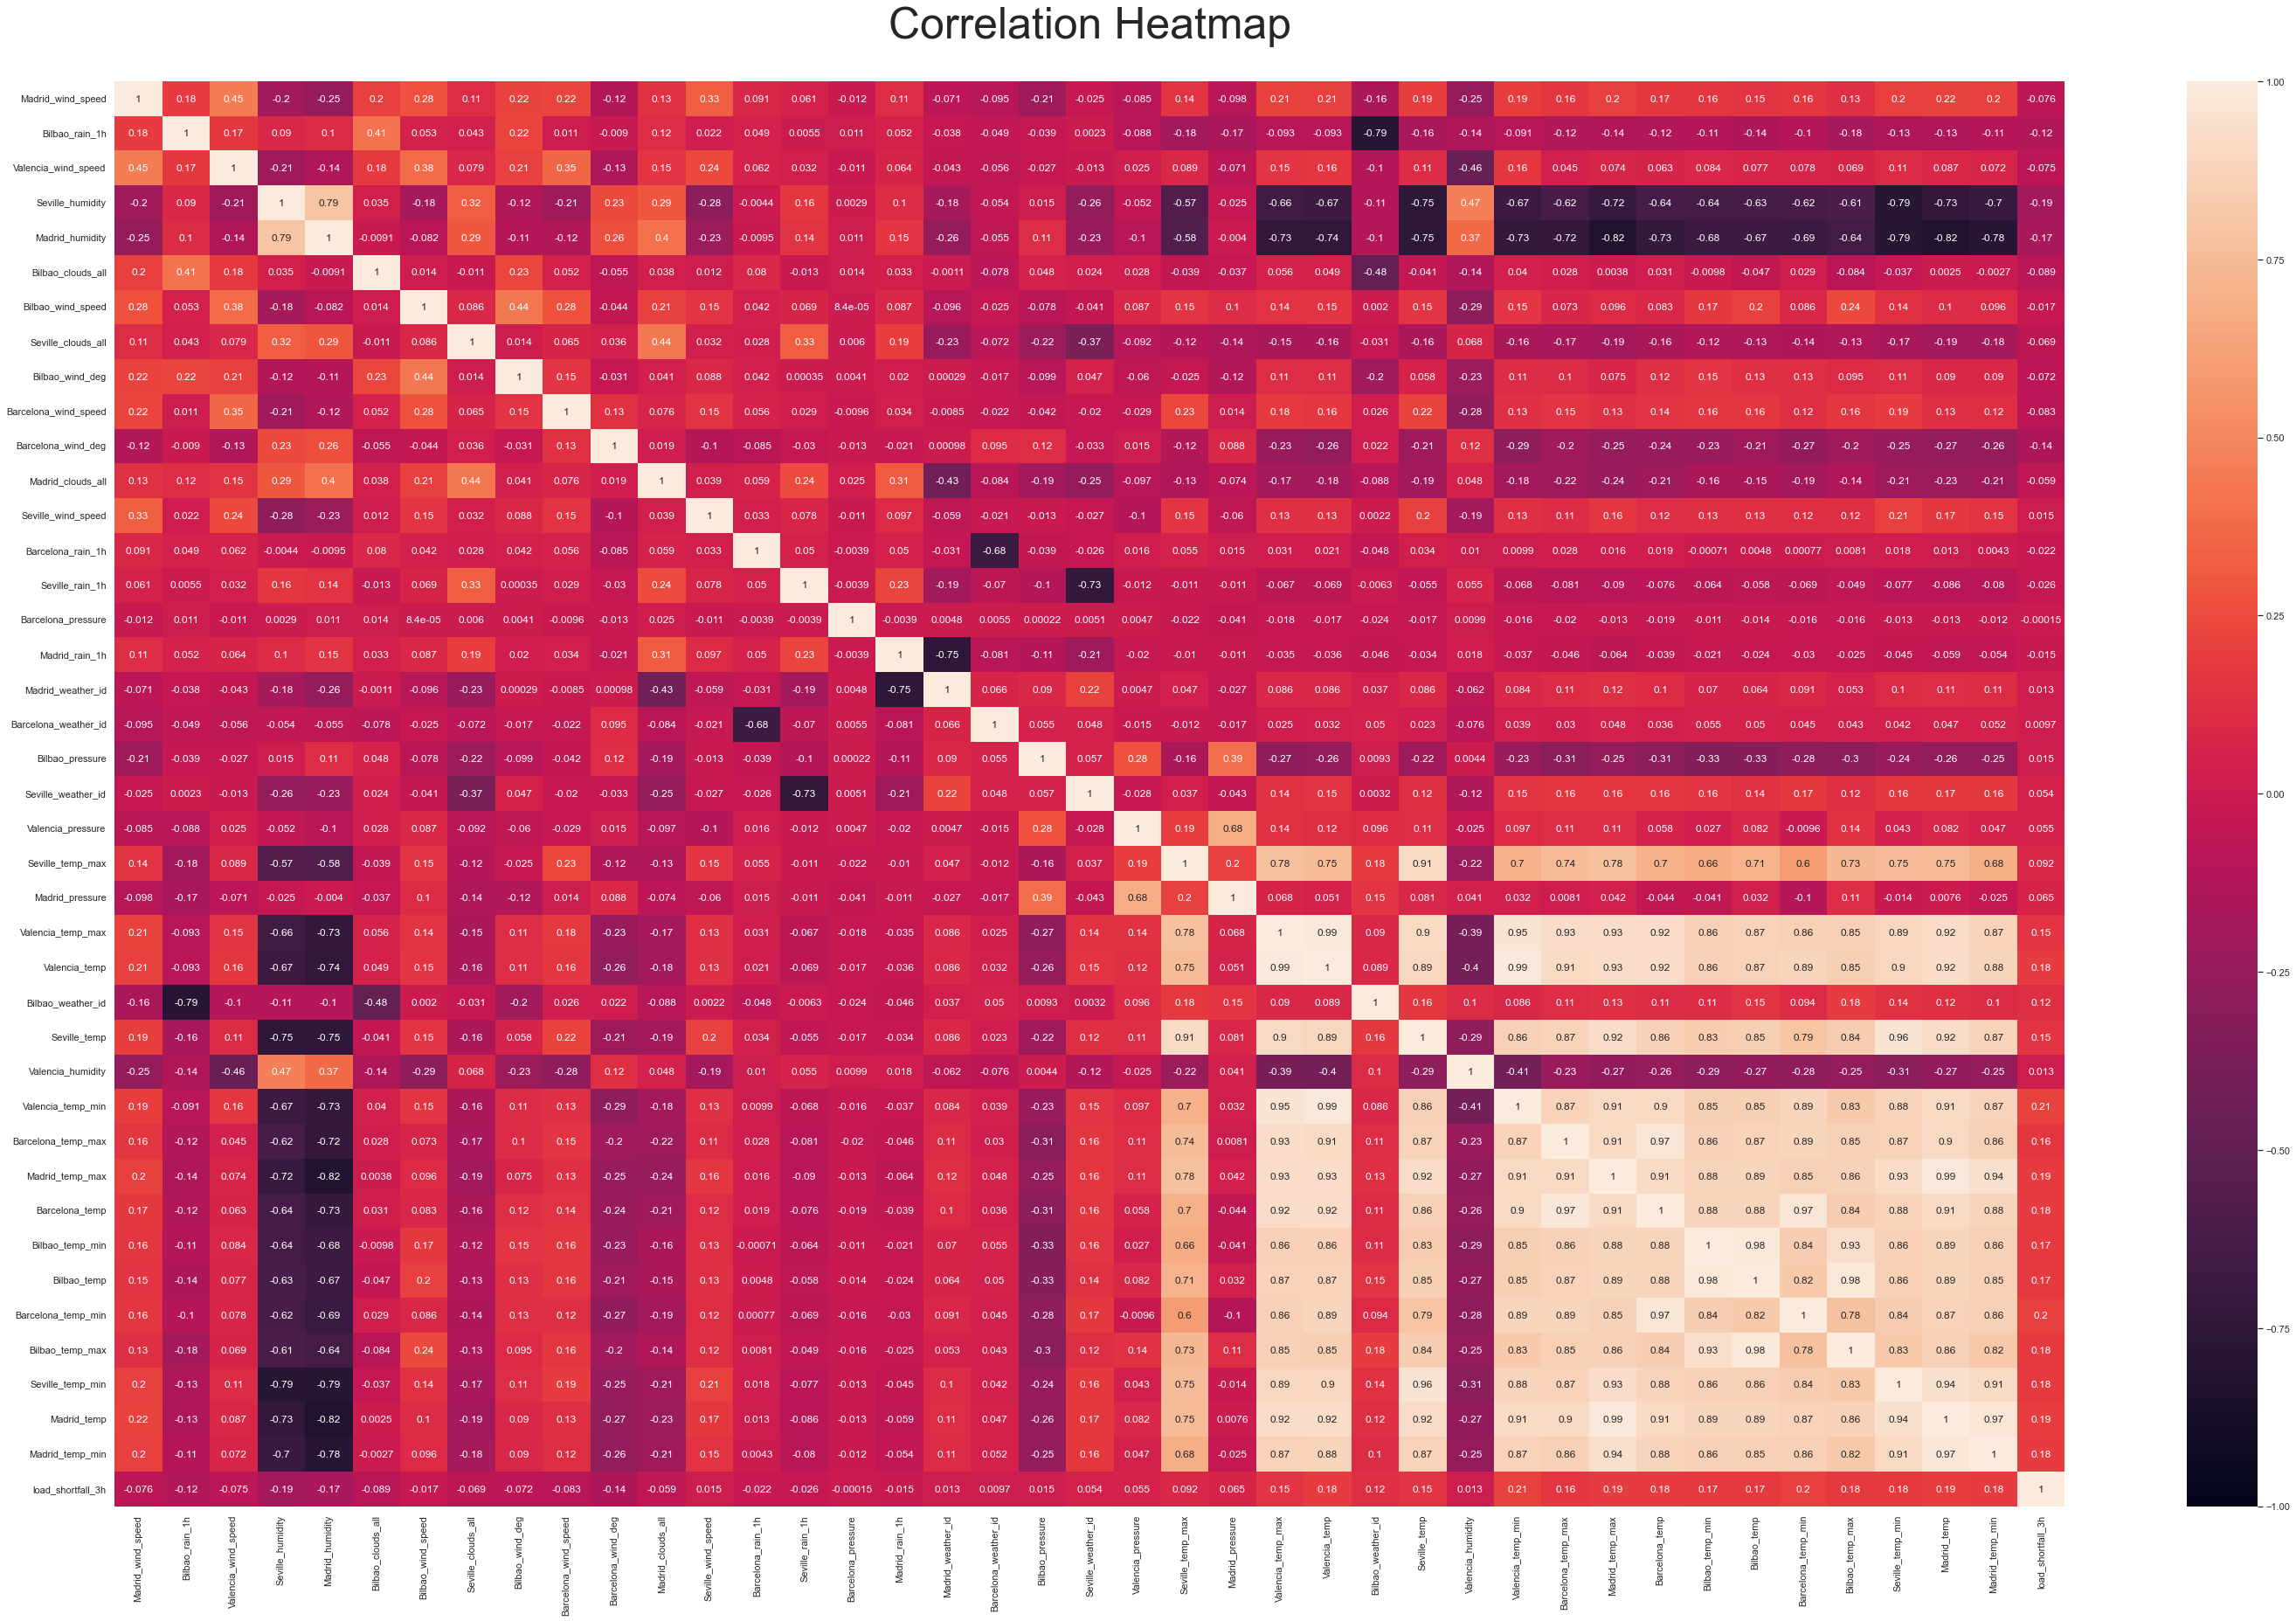

In [88]:
# engineer existing features
correlation = df2.corr()

plt.figure(figsize =(50,30))
thegraph = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
thegraph.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=50);




In the **Heatmap** above, we observe a high number of highly correlated features, amongst the minimum and maximum temperatures.


This can be problematic because it will becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently as the independent variables will tend to change in unison. To train our model well, we blieve it is better to drop those features that highly correlated to each other.


The code below will remove one of each of the highly correlated pairs of features that are highly correlated with each other.

In [89]:
def correlations(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [90]:
corr_features = correlations(df2, 0.6)
len(set(corr_features))
print('Correlated features: ', len(set(corr_features)))
print('Correlated features are: ', corr_features)

Correlated features:  20
Correlated features are:  {'Bilbao_temp', 'Valencia_temp_max', 'Madrid_weather_id', 'Madrid_humidity', 'Barcelona_temp_min', 'Barcelona_temp', 'Seville_weather_id', 'Seville_temp', 'Barcelona_temp_max', 'Valencia_temp_min', 'Barcelona_weather_id', 'Madrid_temp', 'Madrid_temp_min', 'Valencia_temp', 'Madrid_temp_max', 'Bilbao_temp_min', 'Seville_temp_min', 'Bilbao_temp_max', 'Madrid_pressure', 'Bilbao_weather_id'}


In [91]:
df2.shape

(6754, 41)

In [92]:
df2_non_corr=df2.drop(corr_features, axis=1)

In [93]:
df2_non_corr.shape

(6754, 21)

In [94]:
df2_non_corr.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Valencia_humidity,load_shortfall_3h
Madrid_wind_speed,1.000000,0.180783,0.451082,-0.202300,0.203596,0.278489,0.109442,0.216097,0.219534,-0.123297,0.134545,0.325914,0.091306,0.060787,-0.012309,0.110971,-0.207785,-0.085391,0.144531,-0.251666,-0.075951
Bilbao_rain_1h,0.180783,1.000000,0.167871,0.089938,0.407898,0.053439,0.042992,0.223858,0.011160,-0.009032,0.115718,0.021648,0.048730,0.005528,0.011090,0.052270,-0.038561,-0.088453,-0.183723,-0.136391,-0.119471
Valencia_wind_speed,0.451082,0.167871,1.000000,-0.206984,0.176794,0.379453,0.078724,0.209220,0.352721,-0.125683,0.152155,0.240704,0.062480,0.032077,-0.011432,0.064387,-0.026544,0.024773,0.089025,-0.464727,-0.075079
Seville_humidity,-0.202300,0.089938,-0.206984,1.000000,0.035347,-0.177812,0.324349,-0.124794,-0.205305,0.234401,0.294409,-0.282481,-0.004390,0.159438,0.002882,0.103771,0.014954,-0.051942,-0.569280,0.466658,-0.189007
Bilbao_clouds_all,0.203596,0.407898,0.176794,0.035347,1.000000,0.013938,-0.011461,0.232816,0.052127,-0.055250,0.037861,0.011682,0.079623,-0.013327,0.013806,0.032614,0.048418,0.027663,-0.039107,-0.139864,-0.088659
Bilbao_wind_speed,0.278489,0.053439,0.379453,-0.177812,0.013938,1.000000,0.086047,0.435437,0.279599,-0.044400,0.205122,0.152662,0.042238,0.069422,0.000084,0.087033,-0.078145,0.087152,0.149493,-0.285477,-0.016831
Seville_clouds_all,0.109442,0.042992,0.078724,0.324349,-0.011461,0.086047,1.000000,0.014393,0.064636,0.036059,0.437149,0.031867,0.027758,0.326655,0.005978,0.194955,-0.224377,-0.092021,-0.117122,0.067997,-0.069262
Bilbao_wind_deg,0.216097,0.223858,0.209220,-0.124794,0.232816,0.435437,0.014393,1.000000,0.153268,-0.030726,0.041128,0.088221,0.041844,0.000346,0.004093,0.019793,-0.099084,-0.059640,-0.025351,-0.225988,-0.071816
Barcelona_wind_speed,0.219534,0.011160,0.352721,-0.205305,0.052127,0.279599,0.064636,0.153268,1.000000,0.133934,0.075792,0.148023,0.056397,0.029008,-0.009575,0.034321,-0.042480,-0.028755,0.233785,-0.278852,-0.083059
Barcelona_wind_deg,-0.123297,-0.009032,-0.125683,0.234401,-0.055250,-0.044400,0.036059,-0.030726,0.133934,1.000000,0.018892,-0.104292,-0.084870,-0.030479,-0.012658,-0.021005,0.115682,0.015133,-0.120456,0.119167,-0.144951


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more regression models that are able to accurately predict the thee hour load shortfall. 


__5.1. Fitting using Sklearn__

In [95]:
# split predictors and response
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

In [96]:
# create model object
lm = LinearRegression()

In [97]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [98]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [99]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [100]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [101]:
print("Intercept:", beta_0)



Intercept: -37048.18363251475


In [102]:
beta_js

,Coefficient
Madrid_wind_speed,-240.506101
Bilbao_rain_1h,140.804283
Valencia_wind_speed,-135.640506
Seville_humidity,-51.255527
Madrid_humidity,-1.867641
Bilbao_clouds_all,-2.072456
Bilbao_wind_speed,-9.448726
Seville_clouds_all,7.528947
Bilbao_wind_deg,-2.669253
Barcelona_wind_speed,-97.982516


__5.2 Fitting a model using statmodels.OLS__

In [103]:
import statsmodels.formula.api as sm

In [104]:
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,0.0,1038.000000,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,0.0,1037.000000,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,0.0,1035.000000,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [105]:
Xdata = df2.drop(['load_shortfall_3h'], axis=1)
ydata = df2['load_shortfall_3h']

In [106]:
formula_str = df2.columns[-1] +' ~ '+'+'.join(df2.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp'

__construct and fit the model__

In [107]:
model=sm.ols(formula=formula_str, data=df2)

In [108]:
fitted = model.fit()

__Print model summary__

In [109]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     26.89
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          1.47e-179
Time:                        09:08:28   Log-Likelihood:                -66747.
No. Observations:                6754   AIC:                         1.336e+05
Df Residuals:                    6714   BIC:                         1.338e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.275e+04 

#### Standardization and Regularisation with scikit

Regularisation offers an alternative method to the variable selection selection performed above. With regularisation the intention to scale each feature by how much it affects. There is a penality on those individual coefficients that get too large (those that contribute the most to reducing the fit).


We will now offer an alternative model. Where ther is no descrete model selection as above but a model that is achieved through ridge regression

In [28]:
df_no_missing.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,1038.000000,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,1037.000000,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,1035.000000,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


#### Scaling with **Z-score standardisation** 

We have to scale the variables beofre we can regularise the data frame. The reason to scale the variables is to ensure that the regularisation term regularises(affects) the variables involved in the same manner. If the variables have significantly different scales regularising on these variables would be illogical.

In [29]:
# split predictors and response
X = df_no_missing.drop(['load_shortfall_3h','time','Valencia_wind_deg', 'Seville_pressure'], axis=1)
y = df_no_missing['load_shortfall_3h']

In [30]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [31]:
# Create scaler object
scaler = StandardScaler()

In [32]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [33]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,-0.224278,-0.024158,-0.247776,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,-0.224278,-0.024229,-0.247776,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,-0.224278,-0.024372,-0.247776,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665


#### Ridge Regression

In [34]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [35]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [36]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [37]:
# Create ridge model
ridge = Ridge()

In [38]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [39]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [40]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [41]:
print("Intercept:", float(b0))

Intercept: 10530.006548650243


In [42]:
# Check out the coefficients
coeff

,Coefficient
Madrid_wind_speed,-461.765916
Bilbao_rain_1h,-120.067238
Valencia_wind_speed,-149.802105
Seville_humidity,-927.265469
Madrid_humidity,15.427088
Bilbao_clouds_all,-168.246747
Bilbao_wind_speed,-57.109798
Seville_clouds_all,68.625637
Bilbao_wind_deg,-379.752723
Barcelona_wind_speed,-164.097605


#### Assess the predictive accuracy of the  model 

In [43]:
# Import metrics module
from sklearn import metrics

In [49]:
train_ridge = ridge.predict(X_train)

In [55]:
print('Ridge Train MSE:', round(metrics.mean_squared_error(y_train, train_ridge)))

Ridge Train MSE: 23333679


In [51]:
test_ridge = ridge.predict(X_test)

In [58]:
print('Ridge train MS :', round(metrics.mean_squared_error(y_test, test_ridge)))

Ridge train MS : 23431943


In [110]:
# create one or more ML models

In [111]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [112]:
# Compare model performance

In [113]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [114]:
# discuss chosen methods logic